In [1]:
import pandas as pd
import numpy as np
import plotly.express as px
import scipy.stats as stats

In [2]:
# 강의실용
member_df = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\One_Market_Data\member_data.csv')
df1 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\One_Market_Data\product_data_001.csv')
df2 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\One_Market_Data\product_data_002.csv')
df3 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\One_Market_Data\product_data_003.csv')
df4 = pd.read_csv(r'C:\Users\UserK\Desktop\Ranee\data\One_Market_Data\product_data_004.csv')

In [57]:
# 
#path = r'C:\Users\MSI\Desktop\study\Data\One_Market_Data'
#member_df = pd.read_csv(path+'\member_data.csv')
#df1 = pd.read_csv(path+'\product_data_001.csv')
#df2 = pd.read_csv(path+'\product_data_002.csv')
#df3 = pd.read_csv(path+'\product_data_003.csv')
#df4 = pd.read_csv(path+'\product_data_004.csv')

# 데이터 불러오기

In [3]:
print(member_df.shape)
member_df.info()

(11555, 8)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11555 entries, 0 to 11554
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   회원번호         11555 non-null  int64  
 1   조합원상태        11555 non-null  object 
 2   주소           11555 non-null  object 
 3   성별           11553 non-null  object 
 4   연령           11553 non-null  float64
 5   배송서비스신청여부    11555 non-null  object 
 6   모바일알람여부      11555 non-null  object 
 7   Gold_member  11555 non-null  object 
dtypes: float64(1), int64(1), object(6)
memory usage: 722.3+ KB


In [59]:
member_df.isnull().sum()

회원번호           0
조합원상태          0
주소             0
성별             2
연령             2
배송서비스신청여부      0
모바일알람여부        0
Gold_member    0
dtype: int64

In [60]:
member_df['주소'].unique()

array(['수지구-풍덕천동', '처인구-고림동', '광주-기타', '수지구-동천동', '수지구-신봉동', '기흥구-상하동',
       '수지구-상현동', '기타-기타', '수지구-성복동', '분당구-백현동', '분당구-판교동', '수지구-죽전동',
       '분당구-구미동', '기흥구-동백동', '수원 영통구-기타', '기흥구-보정동', '기흥구-청덕동',
       '서울 강남구-기타', '수원 팔달구-기타', '분당구-수내동', '서울 송파구-기타', '기흥구-기타',
       '기흥구-언남동', '분당구-중동', '분당구-삼평동', '기흥구-마북동', '광주-오포읍', '화성-기타',
       '분당구-정자동', '기흥구-중동', '분당구-기타', '중원구-금광동', '처인구-역북동', '수지구-기타',
       '수원 장안구-기타', '처인구-삼가동', '처인구-기타', '수정구-신흥동', '수원 권선구-기타',
       '분당구-서현동', '분당구-야탑동', '기흥구-보라동', '기흥구-구갈동', '처인구-김량장동', '처인구-이동면',
       '분당구-분당동', '기흥구-신갈동', '기흥구-영덕동', '수정구-위례(창곡)동', '하남-기타', '기흥구-죽전동',
       '처인구-모현면', '기타-금광동', '처인구-원삼면', '분당구-이매동', '분당구-금곡동', '기타-신흥동',
       '기흥구-공세동', '기흥구-상갈동', '수정구-복정동', '기흥구-서천동', '광주-산성동', '중원구-도촌동',
       '처인구-유방동', '수원 장안구-정자동', '처인구-남사면', '서울 강남구-은행동', '수원 권선구-금곡동',
       '분당구-궁내동', '수정구-기타', '중원구-성남동', '중원구-여수동', '기타-금곡동', '기타-동천동',
       '기타-비조합원', '수정구-상대원동', '중원구-상대원동', '중원구-은행동', '중원구-하대원동', '기타-중앙동',
       '기타-보라동

In [61]:
print(member_df['주소'].value_counts())

주소
수지구-풍덕천동    3188
수지구-상현동     1601
수지구-신봉동     1422
기타-기타       1126
수지구-동천동      924
            ... 
수정구-복정동        1
수정구-상대원동       1
기타-비조합원        1
기타-동천동         1
기타-성남동         1
Name: count, Length: 95, dtype: int64


In [4]:
# 모바일 알람여부 . -> 미수신
member_df['모바일알람여부'] = member_df['모바일알람여부'].replace('.','미수신')
member_df['모바일알람여부'].value_counts()

모바일알람여부
미수신    10653
수신       902
Name: count, dtype: int64

### 연령대 칼럼 추가

In [5]:
def age_func(row) :
    if pd.isnull(row) :
        return row
    elif row >= 90 :
        return '90대이상'
    else : 
        return str(row)[0]+'0대'
    
member_df['연령대'] = member_df['연령'].apply(age_func)

In [6]:
print(member_df['연령대'].isnull().sum())
member_df['연령대'].value_counts()

2


연령대
40대      4480
50대      2546
30대      2137
60대      1455
70대       736
80대       136
20대        52
90대이상      10
10대         1
Name: count, dtype: int64

In [65]:
member_df.loc[member_df['연령']<20]

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대
4091,1575020160,정상회원,수지구-풍덕천동,여,17.0,미신청,미수신,normal,10대


In [7]:
product_df = pd.concat([df1, df2, df3,df4], ignore_index=True)

In [220]:
product_df.shape

(294645, 12)

In [68]:
product_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294645 entries, 0 to 294644
Data columns (total 12 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   공급일자      294645 non-null  object 
 1   회원번호      294645 non-null  int64  
 2   조합원상태     294645 non-null  object 
 3   물품대분류     294645 non-null  object 
 4   물품중분류     294645 non-null  object 
 5   물품소분류     294645 non-null  object 
 6   물품명       294645 non-null  object 
 7   구매수량      294645 non-null  float64
 8   구매금액      294645 non-null  int64  
 9   구매매장      294645 non-null  object 
 10  반품_원거래일자  4960 non-null    object 
 11  구매시각      294645 non-null  object 
dtypes: float64(1), int64(2), object(9)
memory usage: 27.0+ MB


### 구매시각,공급일자 파생변수들

In [8]:
product_df['구매시각_dt'] =  pd.to_datetime(product_df['구매시각'])
product_df['구매시각_dt'].describe()

C:\Users\UserK\AppData\Local\Temp\ipykernel_476\2870433606.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  product_df['구매시각_dt'] =  pd.to_datetime(product_df['구매시각'])


count                           294645
mean     2024-05-31 14:30:24.506847488
min                2024-05-31 08:08:00
25%                2024-05-31 11:57:00
50%                2024-05-31 14:28:00
75%                2024-05-31 16:51:00
max                2024-05-31 20:52:00
Name: 구매시각_dt, dtype: object

In [9]:
def time_func(row):
    if 8 <= row < 12:
        return '오전'
    elif 12 <= row < 17:
        return '오후'
    else :
        return '저녁'

product_df['시간대'] = product_df['구매시각_dt'].dt.hour.apply(time_func)                                 

In [10]:
product_df['구매시각_시'] = product_df['구매시각_dt'].dt.hour

In [11]:
product_df['시간대'].value_counts()

시간대
오후    150846
오전     74805
저녁     68994
Name: count, dtype: int64

In [12]:
product_df['공급일자_dt'] = pd.to_datetime(product_df['공급일자'])

In [13]:
product_df['월'] = product_df['공급일자_dt'].dt.month
product_df['요일'] = product_df['공급일자_dt'].dt.day_name()

def weekend_func(row) : 
    if row in ['Saturday','Sunday'] :
        return '주말'
    else :
        return '주중'

product_df['주말/주중'] = product_df['요일'].apply(weekend_func)

In [14]:
product_df['월'].value_counts()

월
7     32172
1     31411
8     30813
3     29711
6     29566
5     29532
4     29131
9     27971
2     27498
10    26840
Name: count, dtype: int64

In [228]:
product_df.isnull().sum()

공급일자             0
회원번호             0
조합원상태            0
물품대분류            0
물품중분류            0
물품소분류            0
물품명              0
구매수량             0
구매금액             0
구매매장             0
반품_원거래일자    289685
구매시각             0
구매시각_dt          0
시간대              0
구매시각_시           0
공급일자_dt          0
월                0
요일               0
주말/주중            0
dtype: int64

In [77]:
print('반품갯수 : ',product_df.shape[0]-product_df['반품_원거래일자'].isnull().sum())

반품갯수 :  4960


# 최종 데이터 (고객데이터+구매상품데이터)

In [15]:
onemarket_df = pd.merge(product_df,member_df,on='회원번호')

In [16]:
print(onemarket_df.shape)
onemarket_df.info()

(294645, 27)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294645 entries, 0 to 294644
Data columns (total 27 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   공급일자         294645 non-null  object        
 1   회원번호         294645 non-null  int64         
 2   조합원상태_x      294645 non-null  object        
 3   물품대분류        294645 non-null  object        
 4   물품중분류        294645 non-null  object        
 5   물품소분류        294645 non-null  object        
 6   물품명          294645 non-null  object        
 7   구매수량         294645 non-null  float64       
 8   구매금액         294645 non-null  int64         
 9   구매매장         294645 non-null  object        
 10  반품_원거래일자     4960 non-null    object        
 11  구매시각         294645 non-null  object        
 12  구매시각_dt      294645 non-null  datetime64[ns]
 13  시간대          294645 non-null  object        
 14  구매시각_시       294645 non-null  int32         
 15  공급일자_dt      294645 n

In [17]:
onemarket_df = onemarket_df.drop(columns='조합원상태_y')
onemarket_df = onemarket_df.rename(columns={'조합원상태_x':'조합원상태'})

In [18]:
onemarket_df.columns

Index(['공급일자', '회원번호', '조합원상태', '물품대분류', '물품중분류', '물품소분류', '물품명', '구매수량',
       '구매금액', '구매매장', '반품_원거래일자', '구매시각', '구매시각_dt', '시간대', '구매시각_시',
       '공급일자_dt', '월', '요일', '주말/주중', '주소', '성별', '연령', '배송서비스신청여부', '모바일알람여부',
       'Gold_member', '연령대'],
      dtype='object')

### 모바일 알람 여부에 따른 현황

In [82]:
pv1_mean = onemarket_df.pivot_table(index=['모바일알람여부','회원번호'], values = '구매금액', aggfunc='mean').reset_index()
pv1_sum = onemarket_df.pivot_table(index=['모바일알람여부','회원번호'], values = '구매금액', aggfunc='sum').reset_index()

In [83]:
pv1_mean

,모바일알람여부,회원번호,구매금액
0,미수신,18613824,21059.000000
1,미수신,18764160,-8882.700000
2,미수신,18792000,33311.000000
3,미수신,18942336,17528.750000
4,미수신,18949760,2776.000000
...,...,...,...
11550,수신,1631321920,12405.500000
11551,수신,1635319744,7167.250000
11552,수신,1636290432,12061.000000
11553,수신,1636303424,-2297.000000


In [84]:
pv1_sum

,모바일알람여부,회원번호,구매금액
0,미수신,18613824,21059
1,미수신,18764160,-88827
2,미수신,18792000,33311
3,미수신,18942336,560920
4,미수신,18949760,2776
...,...,...,...
11550,수신,1631321920,49622
11551,수신,1635319744,57338
11552,수신,1636290432,24122
11553,수신,1636303424,-2297


In [85]:
pv1_sum.loc[pv1_sum['구매금액']<0]

,모바일알람여부,회원번호,구매금액
1,미수신,18764160,-88827
11,미수신,20993216,-16464
171,미수신,57302144,-7083
449,미수신,97532800,-24313
659,미수신,135862912,-21824
887,미수신,178216832,-10817
964,미수신,188946368,-957
1067,미수신,204638848,-1149
1167,미수신,221808704,-110462
1423,미수신,263516736,-1340


In [86]:
pv1_sum.loc[pv1_sum['구매금액']<0]['구매금액'].sum()

-1457828

In [87]:
onemarket_df.loc[onemarket_df['회원번호']==18764160]

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,월,요일,주말/주중,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대
214517,2022-04-27,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059,매장D,...,4,Wednesday,주중,기타-기타,여,76.0,미신청,미수신,normal,70대
214518,2022-05-02,18764160,정상회원,간식,과자,스낵,오징어땅콩볼(100g),1.0,4595,매장D,...,5,Monday,주중,기타-기타,여,76.0,미신청,미수신,normal,70대
214519,2022-05-13,18764160,정상회원,건강,건강일반,추출/농축액,흑염소진액(100ml*30봉),-1.0,-166554,매장D,...,5,Friday,주중,기타-기타,여,76.0,미신청,미수신,normal,70대
214520,2022-06-23,18764160,정상회원,간식,식사대용,식사대용/기타,소불고기볶음밥(300g),1.0,9381,매장D,...,6,Thursday,주중,기타-기타,여,76.0,미신청,미수신,normal,70대
214521,2022-07-12,18764160,정상회원,채소,과일채소,메론,메론_머스크/중(1.5~2kg:1통),1.0,14550,매장D,...,7,Tuesday,주중,기타-기타,여,76.0,미신청,미수신,normal,70대
214522,2022-08-22,18764160,정상회원,음료,음료,빙과,딸기꽁꽁(120ml)/매장용,2.0,4020,매장D,...,8,Monday,주중,기타-기타,여,76.0,미신청,미수신,normal,70대
214523,2022-08-22,18764160,정상회원,간식,빵,앙금크림빵,크림빵(75g)/매장,1.0,3063,매장D,...,8,Monday,주중,기타-기타,여,76.0,미신청,미수신,normal,70대
214524,2022-01-22,18764160,정상회원,생활용품,세제/세안,세안비누,키토산비누(4장/1세트),-1.0,-8806,매장A,...,1,Saturday,주말,기타-기타,여,76.0,미신청,미수신,normal,70대
214525,2022-01-22,18764160,정상회원,생활용품,생활용품,치약/칫솔,물사랑치약(150g*2개),1.0,8806,매장A,...,1,Saturday,주말,기타-기타,여,76.0,미신청,미수신,normal,70대
214526,2022-03-29,18764160,정상회원,생활용품,생활용품,위생용품,면생리대(팬티라이너/3개),1.0,21059,매장A,...,3,Tuesday,주중,기타-기타,여,76.0,미신청,미수신,normal,70대


In [88]:
onemarket_df.loc[onemarket_df['회원번호']==399893760].sort_values(by='물품명')

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,월,요일,주말/주중,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대
137438,2022-02-27,399893760,정상회원,반찬,밑반찬,부각/튀각,고추부각(60g),-1.0,-6126,매장B,...,2,Sunday,주말,기타-기타,남,51.0,미신청,미수신,normal,50대
137434,2022-02-21,399893760,정상회원,수산,냉동수산,냉동생선,대구포(400g),-4.0,-104910,매장D,...,2,Monday,주중,기타-기타,남,51.0,미신청,미수신,normal,50대
137435,2022-02-21,399893760,정상회원,수산,냉동수산,냉동생선,대구포(400g),4.0,104910,매장D,...,2,Monday,주중,기타-기타,남,51.0,미신청,미수신,normal,50대
137439,2022-02-21,399893760,정상회원,채소,뿌리채소,무,무(0.7~1kg미만),-1.0,-1914,매장A,...,2,Monday,주중,기타-기타,남,51.0,미신청,미수신,normal,50대
137440,2022-02-21,399893760,정상회원,과실,견과,땅콩,볶은피땅콩(500g),8.0,125586,매장A,...,2,Monday,주중,기타-기타,남,51.0,미신청,미수신,normal,50대
137436,2022-02-21,399893760,정상회원,생활용품,화장품,기초화장품,수피아 내츄럴 수분미스트토너,-8.0,-119459,매장D,...,2,Monday,주중,기타-기타,남,51.0,미신청,미수신,normal,50대
137431,2022-02-21,399893760,정상회원,생활용품,화장품,바디/핸드,수피아 누리봄 손크림(허브향/30g),-17.0,-110653,매장C,...,2,Monday,주중,기타-기타,남,51.0,미신청,미수신,normal,50대
137437,2022-02-27,399893760,정상회원,음료,음료,건강차,양파즙(120ml*20봉),4.0,111036,매장B,...,2,Sunday,주말,기타-기타,남,51.0,미신청,미수신,normal,50대
137432,2022-02-21,399893760,정상회원,축산물,소,한우(냉장),우둔장조림(신선육/300g/국내산),-2.0,-60113,매장C,...,2,Monday,주중,기타-기타,남,51.0,미신청,미수신,normal,50대
137433,2022-02-21,399893760,정상회원,간식,밀가공,간편조리면,우리밀우동(491g/2인분),-4.0,-42883,매장C,...,2,Monday,주중,기타-기타,남,51.0,미신청,미수신,normal,50대


### 모바일 알람 여부에 따른 구매금액 대표값의 차이가 있다 vs 없다

In [89]:
cond1 = onemarket_df['모바일알람여부'] == '수신'

print(stats.normaltest(onemarket_df.loc[cond1]['구매금액']))
print(stats.normaltest(onemarket_df.loc[~cond1]['구매금액']))
# 정규성X

NormaltestResult(statistic=175669.35314839988, pvalue=0.0)
NormaltestResult(statistic=575072.2485612824, pvalue=0.0)


In [90]:
stats.ranksums(onemarket_df.loc[cond1]['구매금액'],onemarket_df.loc[~cond1]['구매금액'])
# 3.829107351120792e-13 < 0.05  ==> 귀무가설(대표값차이가없다) 기각 ==> 대표값의차이가 있다.

RanksumsResult(statistic=-7.261468304893003, pvalue=3.829107351120792e-13)

### 연령대 따른 구매금액 대표값의 차이가 있다 vs 없다

In [233]:
onemarket_df['연령대'].value_counts()

연령대
40대      111834
50대       73701
30대       42774
60대       40191
70대       21634
80대        2943
20대        1090
90대이상       417
10대          42
Name: count, dtype: int64

In [93]:
# 여러 그룹을 비교하려면 Kruskal-Wallis H 검정을 사용하고, 사후검정으로 여러 그룹 간의 차이를 확인
from scipy import stats

In [234]:
cond1 = onemarket_df['연령대'] == '10대'
cond2 = onemarket_df['연령대'] == '20대'
cond3 = onemarket_df['연령대'] == '30대'
cond4 = onemarket_df['연령대'] == '40대'
cond5 = onemarket_df['연령대'] == '50대'
cond6 = onemarket_df['연령대'] == '60대'
cond7 = onemarket_df['연령대'] == '70대'
cond8 = onemarket_df['연령대'] == '80대'
cond9 = onemarket_df['연령대'] == '90대이상'

cond_age_list = [cond1,cond2,cond3,cond4,cond5,cond6,cond7,cond8,cond9]

for cond in cond_age_list :
    print(stats.normaltest(onemarket_df.loc[cond]['구매금액']))

NormaltestResult(statistic=12.796932338901511, pvalue=0.0016641077759983881)
NormaltestResult(statistic=2476.2197054499147, pvalue=0.0)
NormaltestResult(statistic=66628.76671620019, pvalue=0.0)
NormaltestResult(statistic=156967.5680970008, pvalue=0.0)
NormaltestResult(statistic=219829.87513471124, pvalue=0.0)
NormaltestResult(statistic=72683.02585017853, pvalue=0.0)
NormaltestResult(statistic=25449.929805175496, pvalue=0.0)
NormaltestResult(statistic=2429.4212765699067, pvalue=0.0)
NormaltestResult(statistic=954.4314530113008, pvalue=5.5955567041618755e-208)


In [94]:
groups = onemarket_df.groupby('연령대')['구매금액'].apply(list)
stats.kruskal(*groups)

# 5.15480990507967e-147 < 0.05  ==> 귀무가설(대표값차이가없다) 기각 ==> 대표값의차이가 있다.

KruskalResult(statistic=705.3065882108048, pvalue=5.15480990507967e-147)

In [258]:
onemarket_df.loc[cond1].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)                                                                                 

,구매금액
물품중분류,
소,47478
돼지,42500
과일,37676


In [249]:
onemarket_df.loc[cond2].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)


,구매금액
물품중분류,
소,628502
유제품,617871
알,508275


In [269]:
p30 = onemarket_df.loc[cond3].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3).reset_index()
p30

,물품중분류,구매금액
0,음료,23397862
1,알,20322516
2,소,18555175


In [272]:
onemarket_df.loc[cond4].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3).reset_index()

,물품중분류,구매금액
0,알,67352343
1,육가공,60693224
2,중량(정육),56386535


In [273]:
onemarket_df.loc[cond5].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3).reset_index()

,물품중분류,구매금액
0,과일,46525758
1,알,45616468
2,소,42792742


In [274]:
onemarket_df.loc[cond6].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3).reset_index()

,물품중분류,구매금액
0,소,30578006
1,과일,26822543
2,알,25257177


In [275]:
onemarket_df.loc[cond7].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3).reset_index()

,물품중분류,구매금액
0,소,18786737
1,알,16834067
2,과일,16492354


In [256]:
onemarket_df.loc[cond8].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
과일,2238891
알,2115621
멥쌀,1783276


In [257]:
onemarket_df.loc[cond9].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
장,1713976
소,778018
과일,706229


### 시간대에 따른 구매품목 조회

In [276]:
onemarket_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294645 entries, 0 to 294644
Data columns (total 26 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   공급일자         294645 non-null  object        
 1   회원번호         294645 non-null  int64         
 2   조합원상태        294645 non-null  object        
 3   물품대분류        294645 non-null  object        
 4   물품중분류        294645 non-null  object        
 5   물품소분류        294645 non-null  object        
 6   물품명          294645 non-null  object        
 7   구매수량         294645 non-null  float64       
 8   구매금액         294645 non-null  int64         
 9   구매매장         294645 non-null  object        
 10  반품_원거래일자     4960 non-null    object        
 11  구매시각         294645 non-null  object        
 12  구매시각_dt      294645 non-null  datetime64[ns]
 13  시간대          294645 non-null  object        
 14  구매시각_시       294645 non-null  int32         
 15  공급일자_dt      294645 non-null  date

In [280]:
onemarket_df['구매시각_시'].describe()

count    294645.000000
mean         14.023964
std           2.823293
min           8.000000
25%          11.000000
50%          14.000000
75%          16.000000
max          20.000000
Name: 구매시각_시, dtype: float64

In [282]:
cond1 = onemarket_df['구매시각_시'] == 8
cond2 = onemarket_df['구매시각_시'] == 9
cond3 = onemarket_df['구매시각_시'] == 10
cond4 = onemarket_df['구매시각_시'] == 11
cond5 = onemarket_df['구매시각_시'] == 12
cond6 = onemarket_df['구매시각_시'] == 13
cond7 = onemarket_df['구매시각_시'] == 14
cond8 = onemarket_df['구매시각_시'] == 15
cond9 = onemarket_df['구매시각_시'] == 16
cond10 = onemarket_df['구매시각_시'] == 17
cond11 = onemarket_df['구매시각_시'] == 18
cond12 = onemarket_df['구매시각_시'] == 19
cond13 = onemarket_df['구매시각_시'] == 20
#cond_14 = onemarket_df['구매시각_시'] == 21

cond_age_list = [cond1,cond2,cond3,cond4,cond5,cond6,cond7,cond8,cond9,cond10,cond11,cond12,cond13]

for cond in cond_age_list :
    print(stats.normaltest(onemarket_df.loc[cond]['구매금액']))

NormaltestResult(statistic=30.34230215843594, pvalue=2.577821266297932e-07)
NormaltestResult(statistic=293.7280803337429, pvalue=1.6510406478058112e-64)
NormaltestResult(statistic=61515.74880046551, pvalue=0.0)
NormaltestResult(statistic=85448.28285440673, pvalue=0.0)
NormaltestResult(statistic=57383.417921484404, pvalue=0.0)
NormaltestResult(statistic=36713.10759638228, pvalue=0.0)
NormaltestResult(statistic=46481.47973217833, pvalue=0.0)
NormaltestResult(statistic=43166.329964848934, pvalue=0.0)
NormaltestResult(statistic=87154.75919672592, pvalue=0.0)
NormaltestResult(statistic=38167.98956714377, pvalue=0.0)
NormaltestResult(statistic=39694.03439060699, pvalue=0.0)
NormaltestResult(statistic=60716.42631136917, pvalue=0.0)
NormaltestResult(statistic=1102.4413546303304, pvalue=4.054166036494387e-240)


In [283]:
onemarket_df.loc[cond1].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
떡,36374
과자,18953
유제품,17038


In [284]:
onemarket_df.loc[cond2].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
음료,408421
멥쌀,315495
육가공,206947


In [285]:
onemarket_df.loc[cond3].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
과일,31721987
소,24364925
알,24230712


In [286]:
onemarket_df.loc[cond4].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
알,20674235
과일,20658845
소,18457264


In [287]:
onemarket_df.loc[cond5].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
과일,18140927
알,17571791
소,16160337


In [288]:
onemarket_df.loc[cond6].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
알,17273097
과일,16373478
소,15268627


In [289]:
onemarket_df.loc[cond7].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
알,16840459
소,15485713
음료,14424839


In [290]:
onemarket_df.loc[cond8].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
알,18431825
소,17759276
육가공,14591571


In [291]:
onemarket_df.loc[cond9].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
알,20796853
소,18305176
육가공,16091438


In [292]:
onemarket_df.loc[cond10].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
알,17988900
중량(정육),16170258
육가공,15224311


In [293]:
onemarket_df.loc[cond11].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
알,13939144
육가공,12902390
소,12290167


In [294]:
onemarket_df.loc[cond12].pivot_table(index='물품중분류' , values='구매금액', aggfunc='sum').sort_values(by='구매금액', ascending=False).head(3)

,구매금액
물품중분류,
알,10232461
육가공,9179389
소,8732458


## RFM

In [19]:
# 최근성
onemarket_df['Rencency'] = max(onemarket_df['공급일자_dt']) - onemarket_df['공급일자_dt']

In [20]:
p1 = onemarket_df.pivot_table(index='회원번호', values = 'Rencency' , aggfunc = 'min').reset_index()
def fun1(row) :
    a = str(row).split(' ')[0]
    return int(a)

p1['R'] = p1['Rencency'].apply(fun1)

In [21]:
# 빈도수
onemarket_df['count'] = 1
p0 = onemarket_df.pivot_table(index=['회원번호','공급일자'], values='count', aggfunc='min').reset_index() # 고객이 결제를 했으면 1, 아니면 넘어감
p2 = p0.pivot_table(index='회원번호', values='count', aggfunc='sum').reset_index()

In [22]:
p2 = p2.rename(columns = {'count' : 'F'})

In [23]:
# 금액
p3 = onemarket_df.pivot_table(index=['회원번호'] , values = '구매금액' , aggfunc='sum').reset_index()

In [24]:
m1 = pd.merge(p1,p2, on='회원번호', how='inner')
m2 = pd.merge(m1,p3, on='회원번호', how='inner')

In [31]:
m2['Score'] = (m2['구매금액']*0.4) + (m2['F']*0.3) - (m2['R']*0.3)

cond1 = m2['Score'] >= m2['Score'].quantile(0.9)
cond2 = m2['Score'] >= m2['Score'].quantile(0.7)
cond3 = m2['Score'] >= m2['Score'].quantile(0.5)
cond4 = m2['Score'] >= m2['Score'].quantile(0.3)

m2['고객등급'] = 'Normal'
m2.loc[cond4, '고객등급'] = 'Silver'
m2.loc[cond3, '고객등급'] = 'Gold'
m2.loc[cond2, '고객등급'] = 'VIP'
m2.loc[cond1, '고객등급'] = 'VVIP'

m2['고객등급'].value_counts() / m2['고객등급'].value_counts().sum()


고객등급
Normal    0.300043
VIP       0.200000
Gold      0.200000
Silver    0.199913
VVIP      0.100043
Name: count, dtype: float64

In [102]:
member_df

,회원번호,조합원상태,주소,성별,연령,배송서비스신청여부,모바일알람여부,Gold_member,연령대
0,1000012800,정상회원,수지구-풍덕천동,여,58.0,미신청,미수신,normal,50대
1,1000103744,정상회원,처인구-고림동,여,34.0,미신청,미수신,normal,30대
2,1000122304,정상회원,광주-기타,여,38.0,미신청,미수신,normal,30대
3,1000163136,정상회원,수지구-동천동,여,73.0,미신청,미수신,normal,70대
4,1000281920,정상회원,수지구-풍덕천동,여,42.0,신청,미수신,normal,40대
...,...,...,...,...,...,...,...,...,...
11550,999682432,탈퇴,수지구-동천동,여,47.0,미신청,미수신,normal,40대
11551,999721408,정상회원,수지구-동천동,여,43.0,미신청,미수신,normal,40대
11552,999738112,정상회원,수지구-성복동,여,67.0,미신청,미수신,normal,60대
11553,999754816,정상회원,수지구-상현동,여,44.0,신청,미수신,normal,40대


In [32]:
m2

,회원번호,Rencency,R,F,구매금액,Score,고객등급
0,18613824,119 days,119,1,21059,8388.2,Normal
1,18764160,69 days,69,8,-88827,-35549.1,Normal
2,18792000,209 days,209,1,33311,13262.0,Normal
3,18942336,11 days,11,12,560920,224368.3,VIP
4,18949760,31 days,31,1,2776,1101.4,Normal
...,...,...,...,...,...,...,...
11550,1644772352,1 days,1,1,85000,34000.0,Silver
11551,1644957952,1 days,1,1,25079,10031.6,Normal
11552,1670400000,0 days,0,281,13060734,5224377.9,VVIP
11553,1670606016,19 days,19,6,129223,51685.3,Gold


In [104]:
cond1 = m2['구매금액'] >= m2['구매금액'].quantile(0.1)
cond2 = m2['F'] >= m2['F'].quantile(0.1)
cond3 = m2['R'] >= m2['R'].quantile(0.8) # 150일

In [105]:
m2.loc[cond1&cond2&cond3, '이탈가능성'] = '이탈고객'

In [106]:
m2['이탈가능성'] = m2['이탈가능성'].replace('nan','잔여고객')

In [107]:
m2['이탈가능성'].value_counts()

이탈가능성
잔여고객    9832
이탈고객    1723
Name: count, dtype: int64

In [108]:
df1 = m2[['회원번호','R','F','Score','고객등급']]
df = pd.merge(onemarket_df, df1, on='회원번호', how='inner')
member_df = pd.merge(member_df, df1, on='회원번호', how='inner')

In [109]:
member_df.to_csv('C:/Users/UserK/Desktop/Ranee/SW_CAMP/member_df.csv', encoding='cp949')

### 모바일 알람여부 별 고객등급 확인

In [110]:
c1 = pd.crosstab(member_df['고객등급'], member_df['모바일알람여부'],margins=True).T
c1

고객등급,1,2,3,4,5,All
모바일알람여부,,,,,,
미수신,1069,1826,2255,3327,2176,10653
수신,87,485,56,139,135,902
All,1156,2311,2311,3466,2311,11555


In [112]:
c1['5_ratio'] = (c1['5'] / c1['All']) * 100
c1['4_ratio'] = (c1['4'] / c1['All']) * 100
c1['3_ratio'] = (c1['3'] / c1['All']) * 100
c1['2_ratio'] = (c1['2'] / c1['All']) * 100
c1['1_ratio'] = (c1['1'] / c1['All']) * 100
c1[[x for x in c1.columns if 'ratio' in x]]

고객등급,5_ratio,4_ratio,3_ratio,2_ratio,1_ratio
모바일알람여부,,,,,
미수신,20.426171,31.230639,21.167746,17.140712,10.034732
수신,14.966741,15.410200,6.208426,53.769401,9.645233
All,20.000000,29.995673,20.000000,20.000000,10.004327


In [114]:
c2 = pd.crosstab(member_df['고객등급'], member_df['연령대'],margins=True).T
c2

고객등급,1,2,3,4,5,All
연령대,,,,,,
10대,0,0,1,0,0,1
20대,6,11,6,14,15,52
30대,249,291,390,703,504,2137
40대,438,867,900,1391,884,4480
50대,257,595,494,724,476,2546
60대,134,348,303,400,270,1455
70대,58,173,178,196,131,736
80대,13,23,37,35,28,136
90대이상,1,3,1,3,2,10


In [115]:
c2['5_ratio'] = (c2['5'] / c2['All']) * 100
c2['4_ratio'] = (c2['4'] / c2['All']) * 100
c2['3_ratio'] = (c2['3'] / c2['All']) * 100
c2['2_ratio'] = (c2['2'] / c2['All']) * 100
c2['1_ratio'] = (c2['1'] / c2['All']) * 100
c2[[x for x in c2.columns if 'ratio' in x]]

고객등급,5_ratio,4_ratio,3_ratio,2_ratio,1_ratio
연령대,,,,,
10대,0.000000,0.000000,100.000000,0.000000,0.000000
20대,28.846154,26.923077,11.538462,21.153846,11.538462
30대,23.584464,32.896584,18.249883,13.617220,11.651848
40대,19.732143,31.049107,20.089286,19.352679,9.776786
50대,18.695994,28.436764,19.402985,23.369992,10.094266
60대,18.556701,27.491409,20.824742,23.917526,9.209622
70대,17.798913,26.630435,24.184783,23.505435,7.880435
80대,20.588235,25.735294,27.205882,16.911765,9.558824
90대이상,20.000000,30.000000,10.000000,30.000000,10.000000


In [ ]:
df_90 = onemarket_df.loc[onemarket_df['연령대'] == '90대이상']
df_90.pivot_table(index='회원번호', values ='구매금액' , aggfunc = 'mean')

### RFM별 구매상품목록

In [ ]:
df.head()

In [ ]:
p3 = df.pivot_table(index = ['고객등급','물품소분류'], values = '구매수량' , aggfunc='sum').reset_index()
p3.info()

In [ ]:
p3.loc[p3['고객등급'] == 'VVIP'].sort_values(by='구매수량', ascending=False)

In [ ]:
p3.loc[p3['고객등급'] == 'VIP'].sort_values(by='구매수량', ascending=False)

In [ ]:
p3.loc[p3['고객등급'] == '일반'].sort_values(by='구매수량', ascending=False)

In [ ]:
p3.loc[p3['고객등급'] == 'S'].sort_values(by='구매수량', ascending=False)

In [ ]:
df['지불가격'] = df['구매수량'] * df['구매금액']

In [ ]:
df.pivot_table(index='물품소분류' , values = '지불가격' , aggfunc = 'sum').sort_values(by='지불가격', ascending=False)

In [ ]:
print(df.loc[df['물품소분류'] == '두부']['구매금액'].mean())
print(df.loc[df['물품소분류'] == '유정란']['구매금액'].mean())
print(df.loc[df['물품소분류'] == '추출/농축액']['구매금액'].mean())

In [ ]:
cond1 = member_df['이탈가능성'] == '이탈고객'

In [ ]:
runrun = member_df[cond1]
runrun['연령대'].value_counts()

In [ ]:
member_df['연령대'].value_counts()

In [ ]:
runrun['연령대'].value_counts() / member_df['연령대'].value_counts()

In [ ]:
p4 = df.pivot_table(index = ['연령대','물품소분류'], values = '구매수량' , aggfunc='sum').reset_index()
p4.info()

In [ ]:
p4.loc[p4['연령대'] == '20대'].sort_values(by='구매수량', ascending=False).head(10)

In [ ]:
p5 = df.loc[df['연령대']=='20대'].pivot_table(index = '시간대', values = 'count' , aggfunc='sum').reset_index()
p5

In [ ]:
p6 = df.loc[df['연령대']=='20대'].pivot_table(index = '구매시각_dt', values = 'count' , aggfunc='sum').reset_index()

In [ ]:
member_df

In [ ]:
product_df

In [ ]:
df = pd.merge(product_df,member_df,on='회원번호')
df = df.drop(columns='조합원상태_y')
df = df.rename(columns={'조합원상태_x':'조합원상태'})

In [ ]:
df.info()

### 구매시각에 따른 현황

In [195]:
df['구매시각_시'] = df['구매시각_dt'].dt.hour
df['count'] = 1

In [201]:
df.pivot_table(index='구매시각_시', values='구매금액' , aggfunc='mean')

,구매금액
구매시각_시,
8,-6352.272727
9,14771.841085
10,10820.485634
11,10891.747869
12,11027.381851
13,11106.942654
14,11217.443990
15,10958.250932
16,10979.937609


In [197]:
p6 = df.pivot_table(index=['공급일자_dt', '회원번호' , '구매시각_시'], values='count', aggfunc='min').reset_index()
p6

,공급일자_dt,회원번호,구매시각_시,count
0,2022-01-01,22270144,11,1
1,2022-01-01,37584000,16,1
2,2022-01-01,39382464,10,1
3,2022-01-01,42474560,16,1
4,2022-01-01,46487232,18,1
...,...,...,...,...
151834,2022-10-30,1622565312,17,1
151835,2022-10-30,1632578432,15,1
151836,2022-10-30,1633872064,13,1
151837,2022-10-30,1641643136,10,1


In [198]:
p6.pivot_table(index='구매시각_시' , values='count' , aggfunc='sum')

,count
구매시각_시,
8,10
9,158
10,18816
11,16137
12,15316
13,14795
14,14404
15,15959
16,17968


In [199]:
df.head()

,공급일자,회원번호,조합원상태,물품대분류,물품중분류,물품소분류,물품명,구매수량,구매금액,구매매장,...,배송서비스신청여부,모바일알람여부,Gold_member,연령대,Rencency,count,R,F,Score,고객등급
0,2022-01-01,272369856,정상회원,과실,과일,사과,사과/유(1.5kg),1.0,22207,매장C,...,미신청,수신,VIP,40대,302 days,1,11,75,599535.6,2
1,2022-01-01,272369856,정상회원,간식,떡,가래떡,떡국떡(유기:800g),1.0,11295,매장C,...,미신청,수신,VIP,40대,302 days,1,11,75,599535.6,2
2,2022-01-01,272369856,정상회원,채소,뿌리채소,우엉/손질,우엉채(200g),1.0,5169,매장C,...,미신청,수신,VIP,40대,302 days,1,11,75,599535.6,2
3,2022-01-01,272369856,정상회원,축산물,알,유정란,유정란/매장용(10알/국내산),1.0,7083,매장C,...,미신청,수신,VIP,40대,302 days,1,11,75,599535.6,2
4,2022-01-01,272369856,정상회원,반찬,절임/장아찌,절임,단무지(김밥용:400g),1.0,4977,매장C,...,미신청,수신,VIP,40대,302 days,1,11,75,599535.6,2


In [ ]:
p7 = df.pivot_table(index=['회원번호','모바일알람여부'] , values = '구매금액' , aggfunc='sum').reset_index()
p7

In [ ]:
p7.loc[p7['모바일알람여부'] == '미수신']['구매금액'].median()

In [ ]:
p7.loc[p7['모바일알람여부'] == '수신']['구매금액'].median()

### 매출차이가 나는 (4,5,6월 VS 7,8월) 주요 품목 비교

In [119]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294645 entries, 0 to 294644
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   공급일자         294645 non-null  object         
 1   회원번호         294645 non-null  int64          
 2   조합원상태        294645 non-null  object         
 3   물품대분류        294645 non-null  object         
 4   물품중분류        294645 non-null  object         
 5   물품소분류        294645 non-null  object         
 6   물품명          294645 non-null  object         
 7   구매수량         294645 non-null  float64        
 8   구매금액         294645 non-null  int64          
 9   구매매장         294645 non-null  object         
 10  반품_원거래일자     4960 non-null    object         
 11  구매시각         294645 non-null  object         
 12  구매시각_dt      294645 non-null  datetime64[ns] 
 13  시간대          294645 non-null  object         
 14  구매시각_시       294645 non-null  int32          
 15  공급일자_dt      2946

In [127]:
p8 = df.pivot_table(index='월', values='구매금액' , aggfunc='sum').reset_index()
p8

,월,구매금액
0,1,340854710
1,2,335517655
2,3,318701266
3,4,307300967
4,5,319699543
5,6,307472697
6,7,359811419
7,8,333950632
8,9,336870046
9,10,294977488


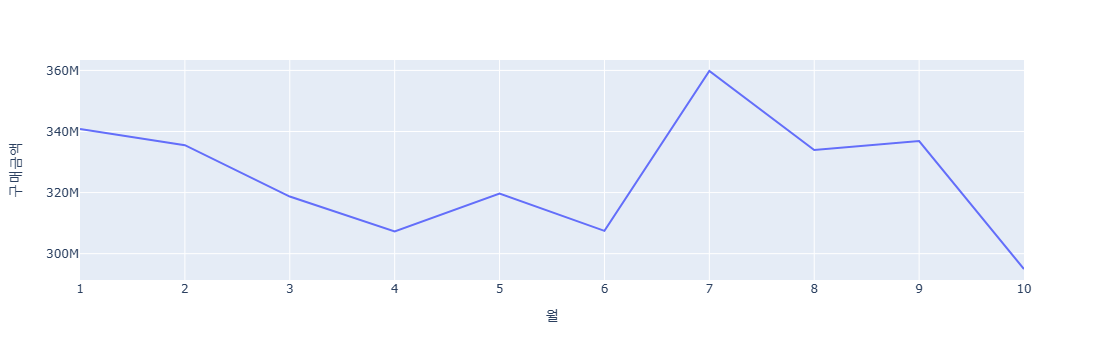

In [129]:
px.line(p8, x='월', y='구매금액')

In [135]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294645 entries, 0 to 294644
Data columns (total 32 columns):
 #   Column       Non-Null Count   Dtype          
---  ------       --------------   -----          
 0   공급일자         294645 non-null  object         
 1   회원번호         294645 non-null  int64          
 2   조합원상태        294645 non-null  object         
 3   물품대분류        294645 non-null  object         
 4   물품중분류        294645 non-null  object         
 5   물품소분류        294645 non-null  object         
 6   물품명          294645 non-null  object         
 7   구매수량         294645 non-null  float64        
 8   구매금액         294645 non-null  int64          
 9   구매매장         294645 non-null  object         
 10  반품_원거래일자     4960 non-null    object         
 11  구매시각         294645 non-null  object         
 12  구매시각_dt      294645 non-null  datetime64[ns] 
 13  시간대          294645 non-null  object         
 14  구매시각_시       294645 non-null  int32          
 15  공급일자_dt      2946

In [173]:
df_month3 = df.loc[df['월'] == 3]
df_month4 = df.loc[df['월'] == 4]
df_month5 = df.loc[df['월'] == 5]
df_month6 = df.loc[df['월'] == 6]
df_month7 = df.loc[df['월'] == 7]
df_month8 = df.loc[df['월'] == 8]
df_month9 = df.loc[df['월'] == 9]

In [133]:
df['물품중분류'].unique()

array(['과일', '떡', '뿌리채소', '알', '절임/장아찌', '밀가공', '생활용품', '중량(정육)', '밑반찬',
       '잎/줄기채소', '생물수산', '가루', '건어물', '수산가공', '두부/유부', '세제/세안', '소',
       '육가공', '감자', '양념채소', '견과', '차', '쌈채소류', '버섯', '콩나물', '해조',
       '유색미/발아미', '과일채소', '꿀', '열매채소', '음료', '돼지', '기름/식초', '장',
       '말린나물/건재', '냉동수산', '빵', '고구마', '콩/화본/깨', '어묵/묵', '유제품', '식사대용',
       '건강일반', '닭/오리', '멥쌀', '과자', '보리/혼합곡', '소스/기타양념', '소금', '화장품',
       '즉석조리', '잼/병조림/기타', '홍삼/녹용', '전통주', '김치', '찹쌀', '비물품', '손질한채소',
       '식기/편백', '과실주', '김장채소', '섬유', '도서', '축산물'], dtype=object)

In [179]:
p_month3 = df_month3.pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10).reset_index()
p_month3 = p_month3.rename(columns={'구매금액': '3월_구매금액'})
p_month3

,물품중분류,3월_구매금액
0,알,18427158
1,과일,16128356
2,중량(정육),14306690
3,소,14148107
4,육가공,13164972
5,잎/줄기채소,11983164
6,돼지,10930876
7,음료,10399450
8,두부/유부,9929994
9,냉동수산,9170204


In [163]:
p_month4 = df_month4.pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10).reset_index()
p_month4 = p_month4.rename(columns={'구매금액': '4월_구매금액'})
p_month4

,물품중분류,4월_구매금액
0,알,18550971
1,소,14954844
2,중량(정육),14826489
3,잎/줄기채소,14487670
4,육가공,12321438
5,과일,11284604
6,음료,11050075
7,건강일반,9883095
8,멥쌀,9730757
9,두부/유부,9395764


In [164]:
p_month5 = df_month5.pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10).reset_index()
p_month5 = p_month5.rename(columns={'구매금액': '5월_구매금액'})
p_month5

,물품중분류,5월_구매금액
0,알,18303115
1,소,16525813
2,중량(정육),14795307
3,음료,13719321
4,육가공,12624210
5,과일채소,12421526
6,잎/줄기채소,11989363
7,멥쌀,9912065
8,돼지,9880290
9,과자,9790314


In [170]:
p_month6 = df_month6.pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10).reset_index()
p_month6 = p_month6.rename(columns={'구매금액': '6월_구매금액'})
p_month6

,물품중분류,6월_구매금액
0,알,18160798
1,과일채소,13894416
2,음료,13712462
3,과일,13647945
4,소,13304995
5,중량(정육),13016025
6,육가공,11544815
7,유제품,9925002
8,건강일반,9812606
9,잎/줄기채소,9710414


In [166]:
p_month7 = df_month7.pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10).reset_index()
p_month7 = p_month7.rename(columns={'구매금액': '7월_구매금액'})
p_month7

,물품중분류,7월_구매금액
0,음료,20818261
1,육가공,18094759
2,알,17397588
3,홍삼/녹용,16556045
4,과일,15327794
5,소,15196250
6,과일채소,12883118
7,열매채소,12766589
8,밀가공,12460892
9,중량(정육),11248916


In [169]:
p_month8 = df_month8.pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10).reset_index()
p_month8 = p_month8.rename(columns={'구매금액': '8월_구매금액'})
p_month8

,물품중분류,8월_구매금액
0,음료,18444916
1,과일,18060671
2,알,17483708
3,육가공,17380911
4,소,15337528
5,중량(정육),12729036
6,냉동수산,12146746
7,멥쌀,11314937
8,열매채소,10795501
9,밀가공,10631484


In [174]:
p_month9 = df_month9.pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10).reset_index()
p_month9 = p_month9.rename(columns={'구매금액': '9월_구매금액'})
p_month9

,물품중분류,9월_구매금액
0,과일,26993496
1,소,18392950
2,알,17435942
3,중량(정육),13833507
4,음료,13273174
5,멥쌀,12220066
6,냉동수산,11569173
7,육가공,11027264
8,건강일반,10448099
9,과자,10245730


In [152]:
df.pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10)

,구매금액
물품중분류,
알,178485837
소,162088918
과일,160820993
육가공,133856851
중량(정육),132482985
음료,131630303
멥쌀,100745210
냉동수산,99585190
건강일반,99118619


In [178]:
p_month2 = df.loc[df['월'] == 2].pivot_table(index='물품중분류' , values='구매금액' , aggfunc='sum').sort_values(by='구매금액',ascending=False).head(10).reset_index()
p_month2 = p_month2.rename(columns={'구매금액': '2월_구매금액'})
p_month2

,물품중분류,2월_구매금액
0,소,23621022
1,알,15577586
2,건강일반,14974725
3,과일,13836266
4,육가공,12425233
5,냉동수산,11231303
6,중량(정육),11176390
7,과자,10670632
8,밀가공,9696918
9,멥쌀,9530767


In [190]:
df_merge = p_month4.merge(p_month6, on='물품중분류', how='outer')

In [191]:
df_merge2 = df_merge.merge(p_month7, on='물품중분류', how='outer')

In [208]:
df_merge_4679 = df_merge2.merge(p_month9, on='물품중분류', how='outer')

In [210]:
df_merge_4679

,물품중분류,4월_구매금액,6월_구매금액,7월_구매금액,9월_구매금액
0,알,18550971.0,18160798.0,17397588.0,17435942.0
1,소,14954844.0,13304995.0,15196250.0,18392950.0
2,중량(정육),14826489.0,13016025.0,11248916.0,13833507.0
3,잎/줄기채소,14487670.0,9710414.0,NaN,NaN
4,육가공,12321438.0,11544815.0,18094759.0,11027264.0
5,과일,11284604.0,13647945.0,15327794.0,26993496.0
6,음료,11050075.0,13712462.0,20818261.0,13273174.0
7,건강일반,9883095.0,9812606.0,NaN,10448099.0
8,멥쌀,9730757.0,NaN,NaN,12220066.0
9,두부/유부,9395764.0,NaN,NaN,NaN


In [212]:
df[df['물품중분류'] == '도서']['물품소분류']

34731       단행본
91613       단행본
216935    도서/기타
242550      단행본
274452      단행본
Name: 물품소분류, dtype: object